<a href="https://colab.research.google.com/github/nalinis07/APT_Ref_Copy_Links/blob/MASTER/AT_Lesson_89_Reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 89: Undersampling

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student.

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**|Undersampling|
|||
|**Class Description**|A student will learn to balance an imbalanced dataset through an undersampling technique|
|||
|**Class**|C89|
|||
|**Class Time**|50 minutes|
|||
|**Goal**|Reduce the number of majority class samples using the Random Undersampling technique|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

### Warm-up Quiz

```
TEACHER
I have an exciting quiz question for you! Are you ready to answer this question?

EXPECTED STUDENT RESPONSE
Yes.
```

**Instructions for the Teacher:**
- Please click on the "Quiz Time" button on the bottom right corner of your screen to start the In-Class Quiz. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/quiz-time.png' width = 150>

- A quiz will be visible to both you and the student. Encourage the student to answer the quiz question.

- The student may choose the wrong option, help the student to think correctly about the question and then answer again.

- After the student selects the correct option, the "End Quiz" button will start appearing on your screen. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/end-quiz.png' width = 150>  

- Click the "End quiz" button to close the quiz pop-up and continue the class.
  
- Do not spend more than 2 minutes on this quiz.

---

### Teacher-Student Activities

In the previous classes, you learnt to find unwanted values in a data frame, convert numeric values reported as non-numeric to numeric values and change the column names. In this class, you will learn to reduce the majority class samples in a data frame using the random undersampling technique.

Let's quickly go through the activities covered in the previous class and start this lesson from **Activity 1: Mapping Non-Numeric Categorical Values to Numeric** section.

**Data Description**

There are 1559 columns in the data. Each row in the data represents one image that is tagged as an `ad.` or `nonad.` in the last column. Here's the description of each column:

- **`Unnamed: 0`**: Unique ID of each image
- **`0`**: Height of an image
- **`1`**: Width of an image
- **`2`**: Aspect ratio (ratio of width to the height) of an image
- Columns **`3`** to **`1557`**: Pixel values of an image
- **`1558`**: Whether the image belongs to an advertisement or not

**Dataset credits:** *https://archive.ics.uci.edu/ml/citation_policy.html*

**Citation:**

Dua, D., & Graff, C.. (2017). UCI Machine Learning Repository.






---

#### Loading Dataset

Let's import all the required Python modules and load the dataset. Here's the link to the dataset:

https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/ad-or-nonad.csv

In [ ]:
# Import all the required Python modules and load the dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/ad-or-nonad.csv")

# Drop the 'Unnamed: 0' column from the data frame.
df.drop(columns = "Unnamed: 0", inplace = True)

# Get information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, 0 to 1558
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Get information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, 0 to 1558
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB


In [ ]:
# Rename the columns '0, 1, 2' and '1558' of the data frame with their correct names as stated  654 above.
df = df.rename(columns = {"0": "height", "1": "width", "2": "aspect ratio", "1558": "target"})

# Calculate the total sum of the missing (or null) values in all the columns in the data frame.
df.isnull().sum().sum()

0

---

#### Removing Rows from Pandas DataFrame

To **remove** all the rows containing question marks in both `height` and `width` columns:

1. Retrieve all the rows containing question marks in both `height` and `width` columns

2. Use the tilde (`~`) symbol to reverse (or conjugate or negate) the conditional statement used to retrieve all the rows containing question marks in both `height` and `width` columns.

In [ ]:
# Remove all the rows containing question marks in both height and width columns
df = df[~((df["height"] == "   ?") & (df["width"] == "   ?"))]

# Remove the above 9 rows containing unwanted values in both 'height' and 'aspect ratio' columns.
df = df[df["height"] != "   ?"]

# Remove the above 7 rows containing unwanted values in both 'height' and 'aspect ratio' columns.
df = df[df["width"] != "   ?"]

# Remove the rows containing unwanted values in the column titled '3'.
df = df[df["3"] != "?"]

# Convert the numeric values reported as the non-numeric values to numeric values in all the columns except in the target column.
df[df.columns[:-1]] = df[df.columns[:-1]].apply(pd.to_numeric)
df

,height,width,aspect ratio,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,target
0,125,125,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3273,30,30,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,nonad.
3274,170,94,0.5529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nonad.


---

#### Activity 1: Mapping Non-Numeric Categorical Values to Numeric

The labels or classes in the `target` column are `nonad.` and `ad.` that are non-numeric values. To be able to build a classification model, we first, have to map them to numeric values. For this, you can use the `map()` function of the Pandas module. It takes a Python dictionary as input containing the old values and new values as key-value pairs.

**Syntax:** `pandas_series.map({old_value1 : new_value1, old_value2: new_value2, ... old_valueN : new_valueN})`

where

- `pandas_series` is a Pandas series containing the values to be mapped.

- `map()` function maps the old values to new values.

- `{old_value1 : new_value1, old_value2: new_value2, ... old_valueN : new_valueN}` is a dictionary containing the old values and new values as key-value pairs.

In [ ]:
# S1.1: Map the 'nonad.' and 'ad.' values to 0 and 1.
df["target"] = df["target"].map({"nonad.": 0, "ad.": 1})

# Find out the unique values contained in the 'target' column after the above operation.
df["target"].unique()

array([1, 0])

Let's get the count of the values stored in the `target` column.

In [ ]:
# S1.2: Get the count of the values stored in the target column.
df["target"].value_counts()

0    1978
1     381
Name: target, dtype: int64

---

#### Activity 2: Data Visualisation

Let's create a scatter plot between the columns `height` and `width` of all images to find out whether they follow distinguishing patterns for the advertisement and non-advertisement images.

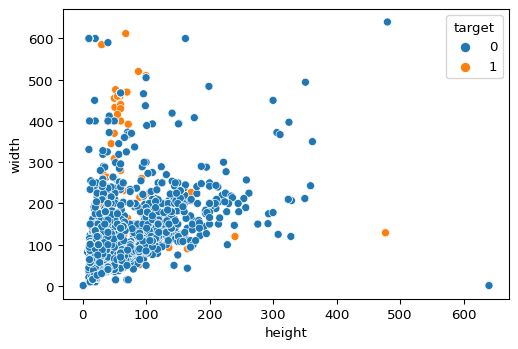

In [ ]:
# S2.1: Create a scatter plot between the columns height and width of all images.
plt.figure(figsize = (6, 4), dpi = 96)
sns.scatterplot(x = "height", y = "width", data = df, hue = "target")
plt.show()

From the scatter plot, we can see that for the advertisement images, the width values are usually higher for a particular height. Let's confirm this obversation by plotting two different box plots:
- One for the width of all the advertisement and
- Another for the width of all the non-advertisement images

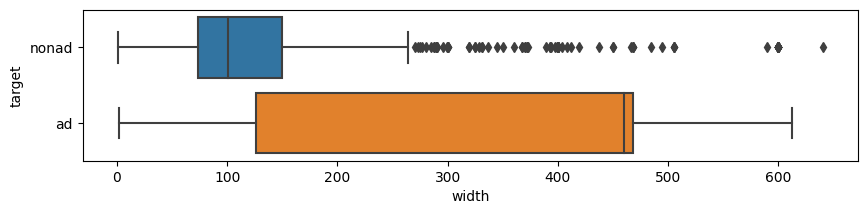

In [ ]:
# S2.2: Create a boxplot to compare the width values for both advertisement and non-advertisement images.
plt.figure(figsize = (10, 2), dpi = 100)
sns.boxplot(x = "width", y = "target", data = df, orient = "h")
plt.yticks(ticks = [0, 1], labels = ["nonad", "ad"])
plt.show()

For the advertisement images:

- The width values are very spread apart from each other.
- Additionally, the median width value is very close to the third quartile value.

So the above box plot confirms the clear distinction between the width of advertisement and non-advertisement images. When we build a classification model using SVM, it should be able to detect this distinction.

Similarly, let's check the trend for the height and and aspect ratio values as well for both the types of images.

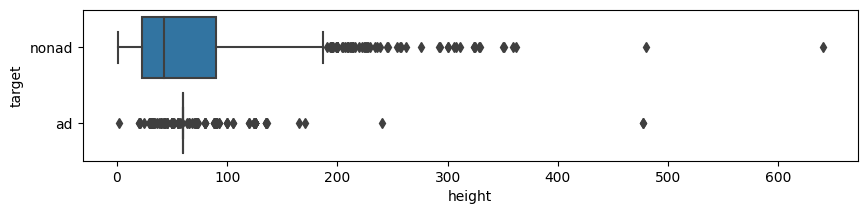

In [ ]:
# S2.3: Create a boxplot to compare the height values for both advertisement and non-advertisement images.
plt.figure(figsize = (10, 2), dpi = 100)
sns.boxplot(x = "height", y = "target", data = df, orient = "h")
plt.yticks(ticks = [0, 1], labels = ["nonad", "ad"])
plt.show()

From the above graph it appears that the first quartile, median and the third quartile height values are coinciding for the advertisement images. Let's calculate these values to verify our observation.

In [ ]:
# S2.4: Calculate 1st, 2nd and 3rd quartile height values are for the advertisement images.
df[df["target"] == 1]["height"].describe()

count    381.000000
mean      67.307087
std       39.296011
min        2.000000
25%       60.000000
50%       60.000000
75%       60.000000
max      477.000000
Name: height, dtype: float64

So our supposition was correct. The three quartile height values for the advertisement images do coincide.

Now let's create the boxplot for the aspect ratio values for both the types of images.

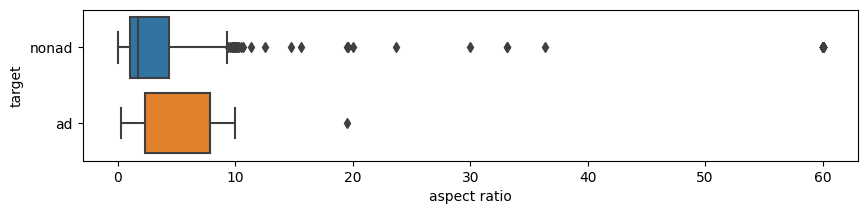

In [ ]:
# S2.5: Create a boxplot to compare the aspect ratio values for both advertisement and non-advertisement images.
plt.figure(figsize = (10, 2), dpi = 100)
sns.boxplot(x = "aspect ratio", y = "target", data = df, orient = "h")
plt.yticks(ticks = [0, 1], labels = ["nonad", "ad"])
plt.show()

In this case too, the aspect ratio values of the advertisement images are generally larger. You can see the median aspect ratio for the `nonad` images is lower than the first quartile aspect ratio for the `ad` images.

---

#### Activity 3: Feature Scaling

So now we know that an SVM classfication model should be able to distinguish between the `ad` and `nonad` images, let's proceed ahead with building it. But before that let's normalise the feature variable values by calculating their $Z$-scores.

So far we have been creating a user-defined function to normalise feature variables with the standard scaler technique. In this lesson, you will learn to do the same with `sklearn` modules built-in `fit_transform()` function that is present in the `StandardScaler` class. To do this, you need to:

1. Import the `StandardScaler` class from the `sklearn.preprocessing` module.

2. You can either create an object of the `StandardScaler` class to call the `fit_transform()` function or you can directly call this function on the `StandardScaler()` constructor.
   
   Inside the `fit_transform()` function, you can provide either both the features and target arrays or only one of the arrays to normalise the values using the standard scaler tecnique. The syntax is provided below:

   **Syntax:** `StandardScaler().fit_transform(feature_dataset)`

   The `fit_transform()` function returns a NumPy array of the scaled feature values where the mean of the distribution is `0` and the standard deviation is `1`.

Let's normalise only the feature variable values using the standard scaler method.



In [ ]:
# S3.1: Normalise the feature column values using the 'StandarScaler' method.

# Import the module
from sklearn.preprocessing import StandardScaler

# Create a DataFrame for the independent features columns
features = df[df.columns[:-1]]

# Scale the feature DataFrame
scaled_features = StandardScaler().fit_transform(features)
scaled_features

array([[ 1.11332804, -0.23524739, -0.48180809, ..., -0.12272017,
        -0.09922646, -0.02912965],
       [-0.12597621,  2.39895364,  0.71081076, ..., -0.12272017,
        -0.09922646, -0.02912965],
       [-0.5633777 ,  0.57114068,  0.50556553, ..., -0.12272017,
        -0.09922646, -0.02912965],
       ...,
       [ 0.67592654, -0.12004909, -0.41794703, ..., -0.12272017,
        -0.09922646, -0.02912965],
       [-0.74562833, -0.27364682,  0.21573459, ..., -0.12272017,
        -0.09922646, -0.02912965],
       [-0.43580227, -0.88803773, -0.48180809, ..., -0.12272017,
        -0.09922646, -0.02912965]])

Now that we have the normalised the feature values, let's create a DataFrame from the `scaled_features` array. To do this, you can use the `pd.DataFrame()` constructor with `scaled_features` data and column names from the original DataFrame as input to the constructor.

In [ ]:
# S3.2: Create a Pandas DataFrame for the scaled features having the same column names as the non-scaled features data frame.
scaled_features_df = pd.DataFrame(data = scaled_features, columns = [df.columns[:-1]])
scaled_features_df

,height,width,aspect ratio,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
0,1.113328,-0.235247,-0.481808,0.562500,-0.046087,0.0,-0.079996,-0.068446,-0.068446,-0.12272,-0.068446,-0.082637,-0.111563,0.0,-0.082637,-0.068446,-0.065247,-0.071505,-0.079996,-0.054554,-0.065247,-0.079996,-0.07444,-0.077267,-0.071505,-0.058334,-0.02913,-0.09247,-0.068446,-0.020593,-0.071505,-0.071505,-0.077267,0.0,-0.155936,-0.07444,-0.065247,-0.068446,0.0,-0.07444,...,-0.145644,-0.065247,-0.087687,-0.077267,-0.150134,-0.082637,-0.090109,-0.090109,-0.105567,-0.120928,-0.065247,-0.134636,-0.077267,-0.082637,-0.186143,-0.111563,-0.050497,-0.082637,-0.077267,-0.137864,-0.099226,-0.082637,-0.046087,-0.117267,-0.105567,0.0,-0.07444,-0.02913,-0.065247,-0.061885,-0.041213,-0.061885,-0.035684,-0.046087,-0.050497,-0.09247,-0.119111,-0.12272,-0.099226,-0.02913
1,-0.125976,2.398954,0.710811,0.562500,-0.046087,0.0,-0.079996,-0.068446,-0.068446,-0.12272,-0.068446,-0.082637,-0.111563,0.0,-0.082637,-0.068446,-0.065247,-0.071505,-0.079996,-0.054554,-0.065247,-0.079996,-0.07444,-0.077267,-0.071505,-0.058334,-0.02913,-0.09247,-0.068446,-0.020593,-0.071505,-0.071505,-0.077267,0.0,-0.155936,-0.07444,-0.065247,-0.068446,0.0,-0.07444,...,-0.145644,-0.065247,-0.087687,-0.077267,-0.150134,-0.082637,-0.090109,-0.090109,-0.105567,-0.120928,-0.065247,-0.134636,-0.077267,-0.082637,-0.186143,-0.111563,-0.050497,-0.082637,-0.077267,-0.137864,-0.099226,-0.082637,-0.046087,-0.117267,-0.105567,0.0,-0.07444,-0.02913,-0.065247,-0.061885,-0.041213,-0.061885,-0.035684,-0.046087,-0.050497,-0.09247,-0.119111,-0.12272,-0.099226,-0.02913
2,-0.563378,0.571141,0.505566,0.562500,-0.046087,0.0,-0.079996,-0.068446,-0.068446,-0.12272,-0.068446,-0.082637,-0.111563,0.0,-0.082637,-0.068446,-0.065247,-0.071505,-0.079996,-0.054554,-0.065247,-0.079996,-0.07444,-0.077267,-0.071505,-0.058334,-0.02913,-0.09247,-0.068446,-0.020593,-0.071505,-0.071505,-0.077267,0.0,-0.155936,-0.07444,-0.065247,-0.068446,0.0,-0.07444,...,-0.145644,-0.065247,-0.087687,-0.077267,-0.150134,-0.082637,-0.090109,-0.090109,-0.105567,-0.120928,-0.065247,-0.134636,-0.077267,-0.082637,-0.186143,-0.111563,-0.050497,-0.082637,-0.077267,-0.137864,-0.099226,-0.082637,-0.046087,-0.117267,-0.105567,0.0,-0.07444,-0.02913,-0.065247,-0.061885,-0.041213,-0.061885,-0.035684,-0.046087,-0.050497,-0.09247,-0.119111,-0.12272,-0.099226,-0.02913
3,-0.071301,2.398954,0.642914,0.562500,-0.046087,0.0,-0.079996,-0.068446,-0.068446,-0.12272,-0.068446,-0.082637,-0.111563,0.0,-0.082637,-0.068446,-0.065247,-0.071505,-0.079996,-0.054554,-0.065247,-0.079996,-0.07444,-0.077267,-0.071505,-0.058334,-0.02913,-0.09247,-0.068446,-0.020593,-0.071505,-0.071505,-0.077267,0.0,-0.155936,-0.07444,-0.065247,-0.068446,0.0,-0.07444,...,-0.145644,-0.065247,-0.087687,-0.077267,-0.150134,-0.082637,-0.090109,-0.090109,-0.105567,-0.120928,-0.065247,-0.134636,-0.077267,-0.082637,-0.186143,-0.111563,-0.050497,-0.082637,-0.077267,-0.137864,-0.099226,-0.082637,-0.046087,-0.117267,-0.105567,0.0,-0.07444,-0.02913,-0.065247,-0.061885,-0.041213,-0.061885,-0.035684,-0.046087,-0.050497,-0.09247,-0.119111,-0.12272,-0.099226,-0.02913
4,-0.071301,2.398954,0.642914,0.562500,-0.046087,0.0,-0.079996,-0.068446,-0.068446,-0.12272,-0.068446,-0.082637,-0.111563,0.0,-0.082637,-0.068446,-0.065247,-0.071505,-0.079996,-0.054554,-0.065247,-0.079996,-0.07444,-0.077267,-0.071505,-0.058334,-0.02913,-0.09247,-0.068446,-0.020593,-0.071505,-0.071505,-0.077267,0.0,-0.155936,-0.07444,-0.065247,-0.068446,0.0,-0.07444,...,-0.145644,-0.065247,-0.087687,-0.077267,-0.150134,-0.082637,-0.090109,-0.090109,-0.105567,-0.120928,-0.065247,-0.134636,-0.077267,-0.082637,-0.186143,-0.111563,-0.050497,-0.082637,-0.077267,-0.137864,-0.099226,-0.082637,-0.046087,-0.117267,-0.

The DataFrame `scaled_features_df` create above have the normalised feature values.

Let's calcualte the sum of the mean and standard deviation values of all the features in `scaled_features_df` DataFrame. They should be 0 and 1558 (because there are 1558 columns in the scaled features data frame)respectively.

In [ ]:
# S3.3: Verify the sum of the mean of the columns in 'scaled_features_df' DataFrame.
print(scaled_features_df.mean().sum())
print(scaled_features_df.std().sum())

-1.3010105451159037e-14
1430.3031909288873


As you can see, the sum of the means is very very close to zero because they are of the order $10^{-14}$.

The sum of the standard deviations is less than 1558. This is because there $1558 - 1430 = 128$ columns having all the values as 0. Hence, their individual standard deviation after standard scaling is also 0.

Let's create a SVC model with a linear kernel for classification and train the model with scaled features and target variable.

---

#### Activity 4: Building SVC Model

Using the `values_count()` function, we have seen that the dataset is imbalanced because the `nonad` records are substantially more in number than the `ad` records. Hence, we should ideally first balance the dataset. Nevertheless, we will first, build an SVC model without balancing it and once again after balancing it see any kind of performance improvement.

In [ ]:
# S4.1: Create an SVC model linear using the linear kernel.
# Import the modules
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Split the training and testing data
features_train, features_test, target_train, target_test = train_test_split(scaled_features, df["target"], test_size = 0.3, random_state = 12)

# Create and train the SVC linear model.
svc_clf_lin = SVC(kernel = "linear")
svc_clf_lin.fit(features_train, target_train)
svc_clf_lin.score(features_train, target_train) # The 'score()' function returns the accuracy score of a model.

0.9969715324046032

The accuracy score of the model on the training set is about 99.69%.

Now that we have built a classification model using support vector machines, let's get the predicted target values for the training set and then compare them with the actual values by creating a confusion matrix.

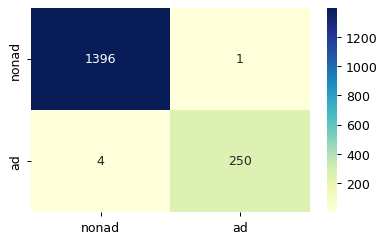

In [ ]:
# S4.2: Predict the target values for the 'features_train' dataset.

# Import the modules
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions for the training features dataset.
target_train_pred = svc_clf_lin.predict(features_train)

# Create a confusion matrix DataFrame between the actual and predicted values for the training set.
cm_train_df = pd.DataFrame(confusion_matrix(target_train, target_train_pred), index = ['nonad', 'ad'], columns = ['nonad', 'ad'])

# Create a heat map to visualise the confusion matrix data frame for the training set.
plt.figure(figsize = (5, 3), dpi = 90)
sns.heatmap(cm_train_df, cmap = "YlGnBu", annot = True, fmt = 'g') # The fmt = 'g' parameter represents the numeric values as string values.
plt.show()

The above heat map shows that,

1. For class **`0` (`nonad`)** values:
  
   i. The number of **correctly** classified (truely predicted) values are 1396

   ii. The number of **incorrectly** classified (falsely predicted) values is 1

2. For class **`1` (`ad`)** values:
  
   i. The number of **correctly** classified (truely predicted) values are 250

   ii. The number of **incorrectly** classified (falsely predicted) values are 4   

The total number of missclassified values are $1 + 4 = 5$

Now, let's calculate the recall, precison and f1-score values to further evaluate the efficacy of the model.


In [ ]:
# S4.3: Calculate the recall, precison and f1-score values to further evaluate the efficacy of the model.
print(classification_report(target_train, target_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1397
           1       1.00      0.98      0.99       254

    accuracy                           1.00      1651
   macro avg       1.00      0.99      0.99      1651
weighted avg       1.00      1.00      1.00      1651



The f1-scores are excellent for both the classes (or labels). This means the SVC model that we built works extremely well on the training set. Let's see how it peforms on the test set.

Now, let's repeat the above steps on the `features_test` dataset for the model created.

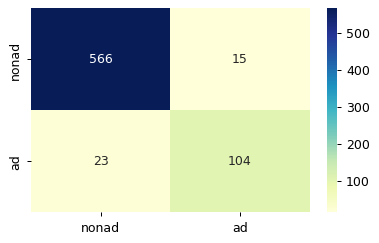

In [ ]:
# S4.4: Predict the classes of the 'features_test' dataset.
# Make predictions for the testing dataset.
target_test_pred = svc_clf_lin.predict(features_test)

# Create a confusion matrix DataFrame between the actual and predicted values for the test set.
cm_test_df = pd.DataFrame(confusion_matrix(target_test, target_test_pred), index = ['nonad', 'ad'], columns = ['nonad', 'ad'])

# Create a heat map to visualise the confusion matrix data frame for the test set.
plt.figure(figsize = (5, 3), dpi = 90)
sns.heatmap(cm_test_df, cmap = "YlGnBu", annot = True, fmt = 'g')
plt.show()

The total number of missclassified values for the test set are $15 + 23 = 38$ which is greater than the number of missclassified values for the training set. This means that the SVC model that we built doesn't work equally well on the test set.


Nevertheless, let's calculate the recall, precison and f1-score values to further evaluate the efficacy of the model.

In [ ]:
# S4.5: Calculate the recall, precison and f1-score values to further evaluate the efficacy of the model on the test set.
print(classification_report(target_test, target_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       581
           1       0.87      0.82      0.85       127

    accuracy                           0.95       708
   macro avg       0.92      0.90      0.91       708
weighted avg       0.95      0.95      0.95       708



The f1-score for the `ad` values is 0.85 which is slightly lower. The reason for this could be that the number of `ad` samples in the dataset is much lower than `nonad` samples. This causing huge imbalance. Let's try to balance the dataset and build an SVC model again.

---

#### Activity 5: Resampling - Undersampling

You have already learnt one of the resampling technique i.e. oversampling technique to increase the samples of the minority class to balance an imbalanced dataset. Now, you will learn the undersampling technique to decrease the samples of the majority class to balance an imbalanced dataset.

The support vector machine algorithm is very sensitive to numbers i.e.

- It doesn't perform well if feature and target variables contain large values.

- It takes a lot of time to train a model on a training set as compared to other classification algorithms. And if a dataset is too larget, it is even more slow.

Thus, if you are using an SVM model for classification on an imbalanced dataset, then first, reduce the number of the majority class samples using the undersampling technique.

To do undersampling:

1. Import the `RandomUnderSampler` class from the `imblearn.under_sampling` module.

2. Create an object of the `RandomUnderSampler` class. Inside its constructor pass:
   
   - `sampling_strategy = 'not minority'` parameter so that only the majority class samples are reduced.

   - `random_state = 42` parameter to ensure that every time you run the code, the same samples are created. The value of the `random_state` parameter has to just some integer. It need not be 42.

3. Call the `fit_resample()` function on the object of the `RandomUnderSampler` class to complete the resampling process. The `fit_resample()` function takes both feature and target arrays and returns corresponding resampled NumPy arrays and DataFrame respectively.




In [ ]:
# S5.1: Reduce the number of majority class samples so that both the majority and minority classes have the equal number of records.
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 'not minority', random_state = 42)
features_rus, target_rus = rus.fit_resample(scaled_features, df["target"])

# Print the object type of the values returned by the 'fit_resample()' function.
print(type(features_rus))
print(type(target_rus))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


Next, let's print the shape of the resampled data and counts of the `nonad` and `ad` samples.

In [ ]:
# S5.2: Print the shape of the resampled data and counts of the nonad and ad samples.
print('Resampled features shape:', features_rus.shape)
print('Resampled target shape:', target_rus.shape, "\n")

print("'nonad' samples count =", np.sum(target_rus == 0))
print("'ad' samples count =", np.sum(target_rus == 1))

Resampled features shape: (762, 1558)
Resampled target shape: (762,) 

'nonad' samples count = 381
'ad' samples count = 381


Let's stop here. In the next class, we will build an SVC model again on the resampled values.

---

#### Activities

**Teacher Activities:**

1. Undersampling (Class Copy)

   https://colab.research.google.com/drive/1Rh6dvpBOtlpxEEvzYJqJDMW3FirzWdMn
   
2. Undersampling (Reference)
   
   https://colab.research.google.com/drive/1MfyJrRmn3AUTZQOa1StYiV_3LWOMUtpU
   

---